# Data Exploration
In this notebook, we will explore the 3 extra files that we have been provided for the paper `Predicting food insecurity through news streams`. The paper uses IPC classfiications from `fews.net` for ground truth data. 


## Initialisation

In [32]:
# %pip install pandas folium numpy matplotlib seaborn gdown --break-system-packages --quiet

In [33]:

import pandas as pd
import numpy as np
import folium
from IPython.display import display, Image
import os
import gdown
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
url = "https://drive.google.com/uc?id=1YoQ1hz9RlaLr2xW3KoKCfJPyyO2PErym"
output = "data.zip"

if not os.path.exists("./data"):
    gdown.download(url, output, quiet=False) 
    zipfile.ZipFile('data.zip', 'r').extractall()
else:
    print("You already have the data downloaded and extracted")

You already have the data downloaded and extracted


In [35]:
df_famine_country = pd.read_csv("./data/famine-country-province-district-years-CS.csv")
df_matching_districts = pd.read_csv("./data/matching_districts.csv")
df_nodes = pd.read_csv("./data/fig_1_nodes.csv")

In [36]:
data = {
    "Seed keyphrase": [
        "famine", "food insecurity", "malnourished", "malnutrition",
        "food crisis", "starvation", "hunger crises", "shortage of food",
        "life-threatening hunger", "lack of food", "scarcity of food",
        "acute hunger", "dearth of food"
    ],
    "Number of articles containing frames": [
        25637, 25404, 12102, 10372, 10154, 8012, 6518, 5482,
        1895, 1266, 1058, 1043, 891
    ]
}

pd.DataFrame(data)


,Seed keyphrase,Number of articles containing frames
0,famine,25637
1,food insecurity,25404
2,malnourished,12102
3,malnutrition,10372
4,food crisis,10154
5,starvation,8012
6,hunger crises,6518
7,shortage of food,5482
8,life-threatening hunger,1895
9,lack of food,1266


In [37]:
def pretty_print_list(list_to_print):
    formatted_columns = "\n- " + "\n- ".join(list_to_print)  
    formatted_columns = sorted(list_to_print)
    print("\n- " + "\n- ".join(formatted_columns))

## Famine CSV

In this section, I will try and analyze the data from the `famine-country-province-district-years-CS.csv` file. 

In [38]:
df_famine_country.head(5)

,Unnamed: 0,country,district,year,month,CS,province
0,0,Ethiopia,Gabi,2009,7,1.0,Afar
1,1,Ethiopia,Gabi,2009,7,2.0,Afar
2,2,Ethiopia,Gabi,2009,7,3.0,Afar
3,3,Ethiopia,East Gojam,2009,7,1.0,Amhara
4,4,Ethiopia,East Gojam,2009,7,2.0,Amhara


I think the `Unnamed` column is the index of the data but it is the same as the index of the data frame. So I will drop it.

In [39]:
df_famine_country.drop(columns=["Unnamed: 0"], inplace=True) # this just seems like a redundant index column

df_columns = pd.DataFrame(df_famine_country.columns.values)

print("\n🗂️ LIST OF ALL COLUMN NAMES IN THE DATASET 🗂️")
print("These are the different attributes available in the dataset for analysis:\n")
df_columns


🗂️ LIST OF ALL COLUMN NAMES IN THE DATASET 🗂️
These are the different attributes available in the dataset for analysis:



,0
0,country
1,district
2,year
3,month
4,CS
5,province


In [40]:
print("No. of rows : ", df_famine_country.shape[0])
print("No. of columns : ", df_famine_country.shape[1])

No. of rows :  157091
No. of columns :  6


In [41]:
print("The data ranges from the year ", df_famine_country['year'].min(), " to ", df_famine_country['year'].max())

The data ranges from the year  2009  to  2017


The paper mentions that they have used data from `from July 2009 to July 2020`. This means that this file does not contain the data for the entire period.

In [42]:
unique_countries = df_famine_country['country'].unique()
formatted_countries = "\n- " + "\n- ".join(sorted(unique_countries))

print(f"\n🌍 The dataset covers the following {len(unique_countries)} countries:\n")
print(formatted_countries)



🌍 The dataset covers the following 39 countries:


- Abyei
- Afghanistan
- Angola
- Burkina Faso
- Burundi
- Cameroon
- Central African Republic
- Chad
- Congo
- Democratic Republic of the Congo
- Djibouti
- El Salvador
- Ethiopia
- Guatemala
- Guinea
- Haiti
- Honduras
- Iilemi triangle
- Kenya
- Liberia
- Madagascar
- Malawi
- Mali
- Mauritania
- Mozambique
- Niger
- Nigeria
- Rwanda
- Senegal
- Sierra Leone
- Somalia
- South Sudan
- Sudan
- Tajikistan
- Tanzania
- Uganda
- Yemen
- Zambia
- Zimbabwe


The paper says that they analyzed data from 21 countries, but this dataset contains 39 unique countries. Upon manual inspection Congo is mentioned twice so there are only 38 unique countries. This is very close to the mention of 37 countries in the FEWS net dataset as mentioned in paper. I assume this dataset is a subset of the FEWS net dataset.

>  The dataset covers 21 of the 37 countries in the FEWS NET dataset—Afghanistan, Burkina Faso, Chad, Democratic Republic of the Congo, Ethiopia, Guatemala, Haiti, Kenya, Malawi, Mali, Mauritania, Mozambique, Niger, Nigeria, Somalia, South Sudan, Sudan, Uganda, Republic of Yemen, Zambia, and Zimbabwe—over the period from July 2009 to July 2020.

In [43]:
countries_mentioned_in_paper_set = set(
    ["Afghanistan", "Burkina Faso", "Chad", "Democratic Republic of the Congo", "Ethiopia", 
    "Guatemala", "Haiti", "Kenya", "Malawi", "Mali", "Mauritania", "Mozambique", "Niger", 
    "Nigeria", "Somalia", "South Sudan", "Sudan", "Uganda", "Republic of Yemen", "Zambia", 
    "Zimbabwe"]
)

extra_countries = set(unique_countries) - countries_mentioned_in_paper_set
formatted_difference = "\n- " + "\n- ".join(sorted(list(extra_countries)))
print(f"Countries in dataset that are not mentioned in paper are {formatted_difference}")

missing_countries = countries_mentioned_in_paper_set - set(unique_countries)
formatted_missing = "\n- " + "\n- ".join(sorted(list(missing_countries)))
print(f"\n\nCountries mentioned in paper that are not in dataset are {formatted_missing}")


Countries in dataset that are not mentioned in paper are 
- Abyei
- Angola
- Burundi
- Cameroon
- Central African Republic
- Congo
- Djibouti
- El Salvador
- Guinea
- Honduras
- Iilemi triangle
- Liberia
- Madagascar
- Rwanda
- Senegal
- Sierra Leone
- Tajikistan
- Tanzania
- Yemen


Countries mentioned in paper that are not in dataset are 
- Republic of Yemen


Okay so upon manual inspection Yemen, Congo are mentioned in the paper but jsut under different names. 

In [44]:
count_rows_for_country = df_famine_country.groupby(['country']).size().reset_index(name='counts')
count_rows_for_country = count_rows_for_country.sort_values(by='counts', ascending=False)
count_rows_for_country

,country,counts
26,Nigeria,27640
1,Afghanistan,18269
13,Guatemala,17331
18,Kenya,13309
32,Sudan,9565
24,Mozambique,6374
12,Ethiopia,6095
31,South Sudan,5533
35,Uganda,5364
36,Yemen,5047


In [45]:
count_rows_for_country_per_district = df_famine_country.groupby(['country', 'district']).size().reset_index(name='counts')
count_rows_for_country_per_district

,country,district,counts
0,Abyei,Abyei,47
1,Afghanistan,Ab Band,40
2,Afghanistan,Ab Kamari,46
3,Afghanistan,Achin,45
4,Afghanistan,Adraskan,41
...,...,...,...
4126,Zimbabwe,Victoria Falls,64
4127,Zimbabwe,Zaka,50
4128,Zimbabwe,Zvimba,42
4129,Zimbabwe,Zvishavane Rural,53


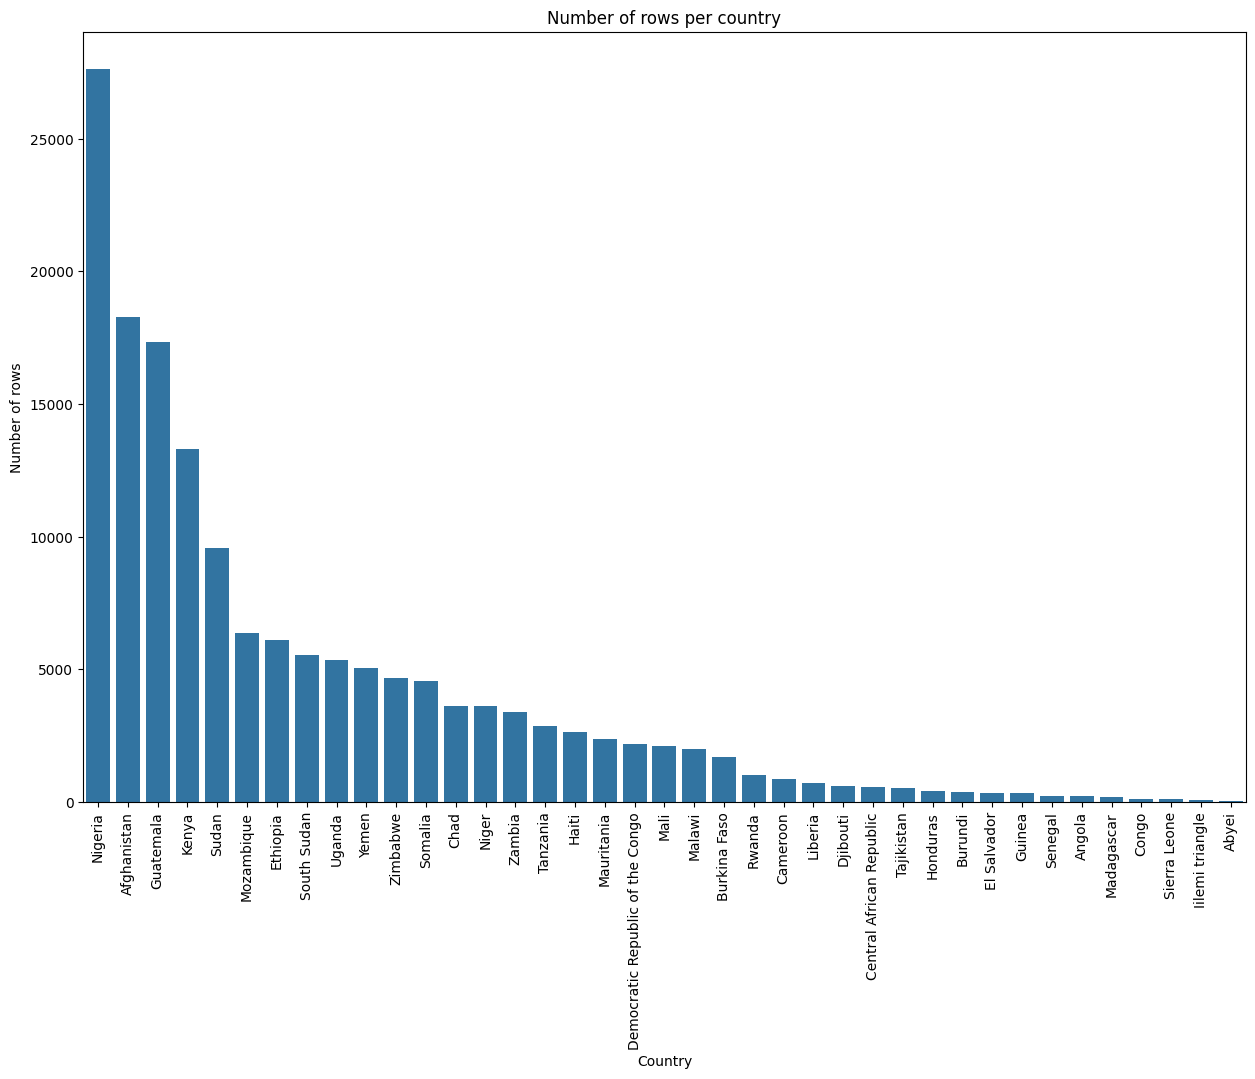

In [66]:
plt.figure(figsize=(15, 10))
sns.countplot(x='country', data=df_famine_country, order = df_famine_country['country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of rows')
plt.title('Number of rows per country')
plt.show()

This to me seems like it is a dataset of famines in different countries and their district by years and dates. I am still confised by what `CS` column means. It could be IPC classification but that has 5 categories only from 1 to 5 whereas this column has values like 88 and 0.

In [46]:
df_unique_cs = pd.DataFrame(df_famine_country["CS"].unique(), columns=["Unique CS Values"])
df_value_counts = df_famine_country["CS"].value_counts().reset_index()
df_value_counts.columns = ["CS Value", "Count"]
df_columns = pd.DataFrame(df_famine_country.columns, columns=["Dataset Columns"])

print("\n🌟 UNIQUE VALUES IN THE 'CS' COLUMN 🌟")
print("Below are all unique values found in the 'CS' column, which might represent different classifications or severity levels:\n")
df_unique_cs



🌟 UNIQUE VALUES IN THE 'CS' COLUMN 🌟
Below are all unique values found in the 'CS' column, which might represent different classifications or severity levels:



,Unique CS Values
0,1.0
1,2.0
2,3.0
3,99.0
4,4.0
5,88.0
6,5.0
7,0.0


/home/iml1/Desktop/world-bank-proj/world-bank/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


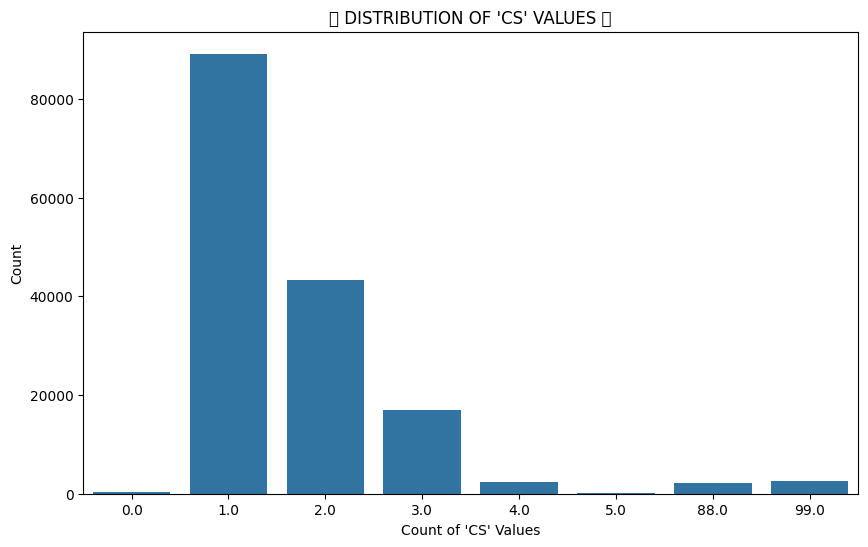

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_value_counts["CS Value"], y=df_value_counts["Count"])
plt.title("DISTRIBUTION OF 'CS' VALUES")
plt.xlabel("Unique 'CS' Values")
plt.show()

Maybe it is a misclassification of the data? But upon inspecting more, there are about 4000 rows of data and it is not possible to be a misclassification. So I am still not sure what this column means.

In [48]:
print("\n📊 FREQUENCY DISTRIBUTION OF COLUMN 📊")
print("This table shows how frequently each unique value appears in the dataset, helping us understand the data distribution:\n")
df_value_counts


📊 FREQUENCY DISTRIBUTION OF COLUMN 📊
This table shows how frequently each unique value appears in the dataset, helping us understand the data distribution:



,CS Value,Count
0,1.0,89185
1,2.0,43355
2,3.0,17035
3,99.0,2660
4,4.0,2326
5,88.0,2138
6,0.0,333
7,5.0,59


### Final Verdict (Subject to change)

The `famine-country-province-district-years-CS.csv` file is used for administrative-level mapping, ensuring consistency across different datasets. It maps districts, provinces, and countries, aligning data from sources like FEWS NET and news reports to the correct geographic regions. The file helps detect missing or misnamed locations.

## Matching districts CSV

In this section, we will analyze the data from the `matching-districts.csv` file.

In [50]:
df_matching_districts.head(5)

,missing,district,province,match
0,Port-Au-Prince,Port au Prince,Ituri,district
1,Teso,Teso South,El Progreso,district
2,Tanganyka,Tanga,Tanga,district
3,Tayeeglow,Tiyeglow,Bay,district
4,Kadoma,Kadoma Urban,Kano,district


This looks like a relatively small dataset as compared to the last one

In [51]:
print("No. of rows : ", df_matching_districts.shape[0])
print("No. of columns : ", df_matching_districts.shape[1])

No. of rows :  230
No. of columns :  4


Just by looking at the head of the data this seems to me like it is some sort of correction of either the district names or province names in the dataset depending on the `match` column. Like the missing and district columns have more less the same values for each row so I think this is a correction of the district names. By analyzing the DF more in Data Wrangler, my suspicions have been proved right. (I think)

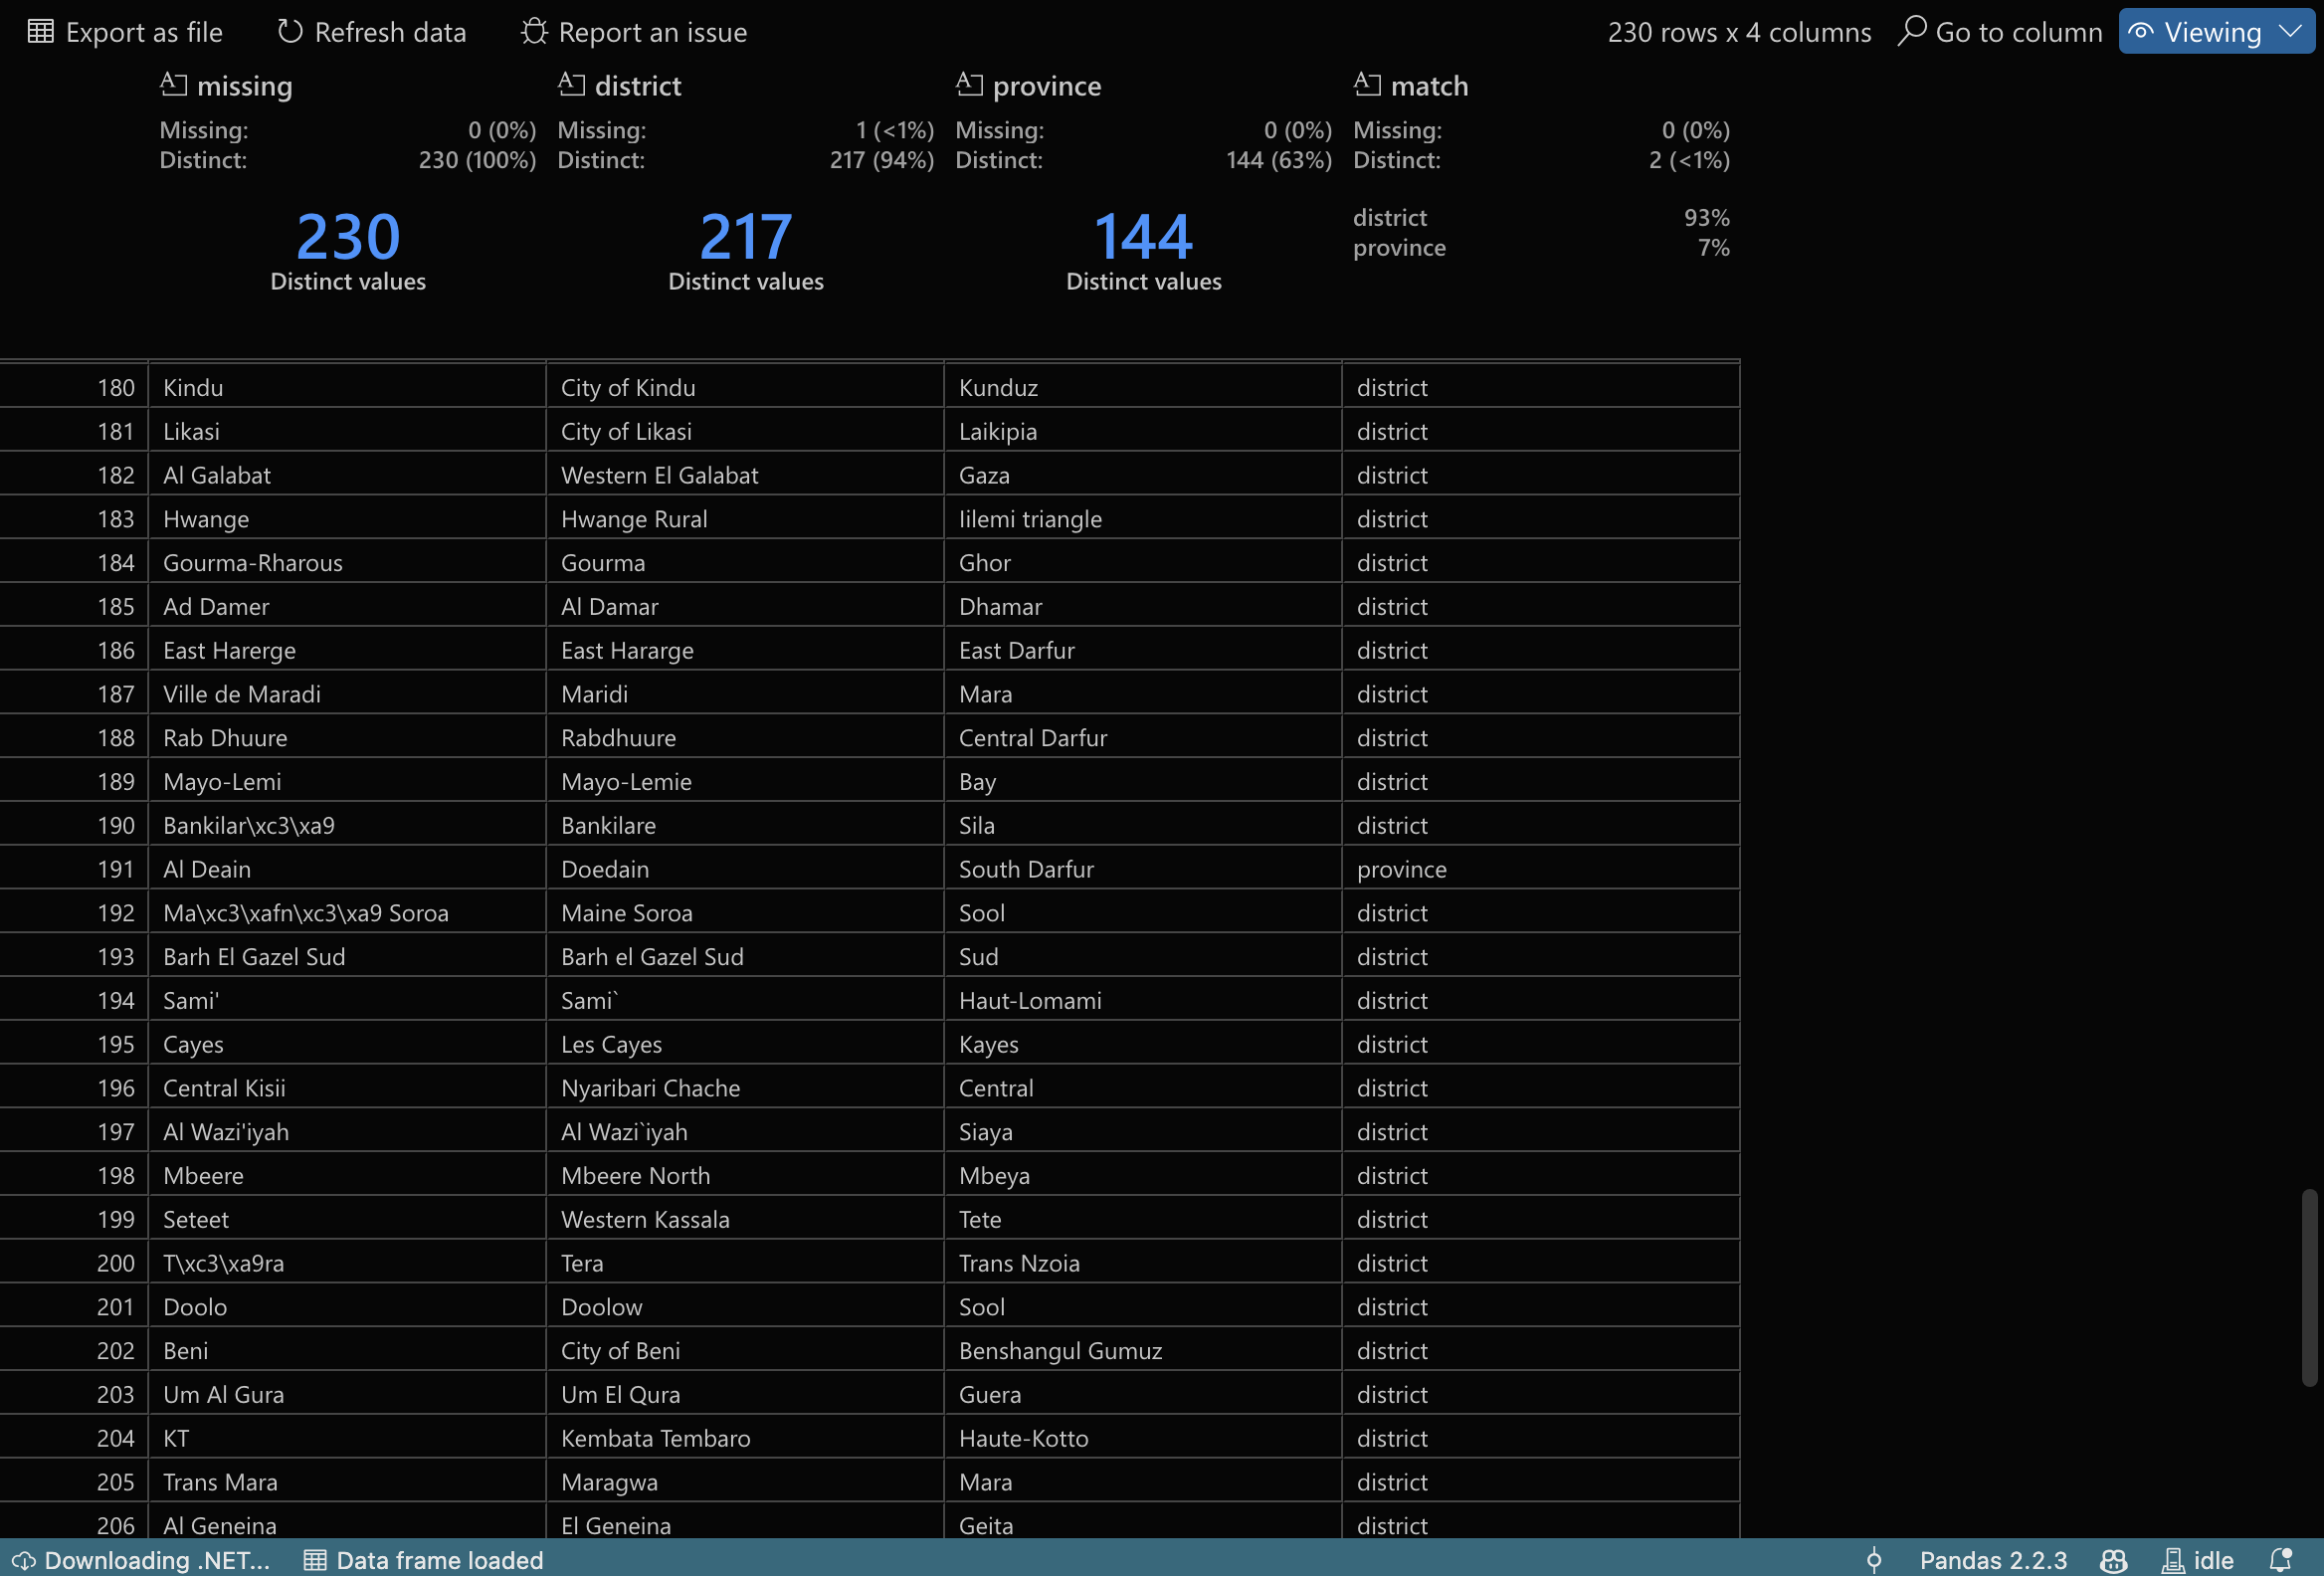

In [52]:
display(Image(filename="matching.png"))

### Final Verdict (Subject to change)
The **`matching_districts.csv`** file appears to contain **mapped corrections** or **standardized district names**, likely used to clean or align geographic data in the study.

- The dataset consists of **four columns**:
  1. **`missing`** → District names that were **incorrect, misspelled, or not found** in the main dataset.
  2. **`district`** → The **corrected district name** that aligns with official records or another dataset.
  3. **`province`** → The **province or administrative region** to which the district belongs.
  4. **`match`** → Specifies whether the correction refers to a **district** or potentially another administrative level.

This dataset is likely used for **data cleaning** to ensure that all districts match a **consistent naming standard**.

---

##### **🔍 Column-by-Column Breakdown**
| **Column Name** | **Likely Meaning** |
|---------------|----------------|
| **`missing`** | Contains district names that were **inconsistent, misspelled, or missing** from the main dataset. |
| **`district`** | The **corrected or standardized** district name that replaces the missing one. |
| **`province`** | The **province or region** associated with the corrected district. |
| **`match`** | Indicates whether the correction applies to a **district** or potentially another entity (e.g., province). |

---

This dataset helps by:
✅ **Fixing inconsistencies** in district names across different datasets.  
✅ **Ensuring accurate matching** of districts to food insecurity data.  
✅ **Improving model accuracy**, as mismatched districts could lead to errors in food crisis predictions.

> As can be seen above in the data wrangler Screenshot, the columns do have some weird encoding leading to many escaped characters.  
> I will have to clean this up (later).


## Nodes CSV

In this section, we will analyze the data from the `fig_1_nodes.csv` file. This file contains the 167 extracted text features in the `labels` column along with their frequency in the `size` column.

In [53]:
df_nodes.head(5)

,Id,label,type,size,cluster
0,0,land seizures,Scientific articles,0.003465,land-related issues
1,1,slashed export,News articles,0.001599,economic issues
2,2,price rise,Scientific articles,0.014945,economic issues
3,3,mass hunger,Keywords expansion,0.002798,food crisis
4,4,cyclone,Scientific articles,0.005988,weather shocks


In [54]:
df_nodes[df_nodes["label"]=="rise"] 

,Id,label,type,size,cluster
81,81,rise,Scientific articles,0.011016,economic issues


In the supplemental material, the number of articles for this term are 1,377,032. So maybe the size column is not the number of articles?

In [55]:
df_nodes.columns.values

array(['Id', 'label', 'type', 'size', 'cluster'], dtype=object)

In [56]:
print("No. of rows : ", df_nodes.shape[0])
print("No. of columns : ", df_nodes.shape[1])

No. of rows :  167
No. of columns :  5


In [57]:
df_nodes.groupby(df_nodes["type"]).size().reset_index(name='counts')

,type,counts
0,Keywords expansion,47
1,News articles,37
2,Scientific articles,83


In [58]:
df_nodes.groupby(df_nodes["cluster"]).size().reset_index(name='counts')

,cluster,counts
0,agricultural production issues,15
1,conflicts and violence,35
2,economic issues,16
3,environmental issues,6
4,food crisis,13
5,forced displacement,7
6,humanitarian aid,16
7,land-related issues,10
8,other,9
9,pests and diseases,7


The number of clusters is the same as mentioned in the paper. 
> To assess the content validity of these 167 features, we partition them into 12 semantically distinct clusters. Text features belonging to the same clusters co-occur in the news about twice as frequently as those in different clusters

In [59]:
df_nodes.sort_values(by='size', ascending=False).head(5) # top 5 nodes by size

,Id,label,type,size,cluster
130,130,corruption,Scientific articles,0.284567,political instability
100,100,coup,Scientific articles,0.183823,political instability
114,114,flee,Scientific articles,0.163953,forced displacement
44,44,terrorism,Scientific articles,0.138273,conflicts and violence
17,17,food insecurity,Scientific articles,0.126337,food crisis
